##  Chronic Kidney Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


In [2]:
kidney_df = pd.read_csv('Chronic_Kidney_Dsease_data.csv')
kidney_df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [3]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

### Categorical and Numerical features selection (manually)

In [4]:
categorical_features = ["Gender",
                        "Ethnicity",
                        "SocioeconomicStatus",
                        "EducationLevel",
                        "Smoking",
                        "FamilyHistoryKidneyDisease",
                        "FamilyHistoryHypertension",
                        "FamilyHistoryDiabetes",
                        "PreviousAcuteKidneyInjury",
                        "UrinaryTractInfections",
                        "ACEInhibitors",
                        "Diuretics",
                        "Statins",
                        "AntidiabeticMedications",
                        "Edema",
                        "HeavyMetalsExposure",
                        "WaterQuality",
                        "Diagnosis",
                        "OccupationalExposureChemicals"
                        ]
numerical_features = ["Age",
                      "BMI",
                      "AlcoholConsumption",
                      "PhysicalActivity",
                      "DietQuality",
                      "SleepQuality",
                      "SystolicBP",
                      "DiastolicBP",
                      "FastingBloodSugar",
                      "HbA1c",
                      "SerumCreatinine",
                      "BUNLevels",
                      "GFR",
                      "ProteinInUrine",
                      "ACR",
                      "SerumElectrolytesSodium",
                      "SerumElectrolytesPotassium",
                      "SerumElectrolytesCalcium",
                      "SerumElectrolytesPhosphorus",
                      "HemoglobinLevels",
                      "CholesterolTotal",
                      "CholesterolLDL",
                      "CholesterolHDL",
                      "CholesterolTriglycerides",
                      "MedicalCheckupsFrequency",
                      "NSAIDsUse",
                      "FatigueLevels",
                      "NauseaVomiting",
                      "MuscleCramps",
                      "Itching",    
                      "HealthLiteracy",
                      "QualityOfLifeScore",
                      "MedicationAdherence"
                      
                      ]
                      
irrelevant_features = ['PatientID', 'DoctorInCharge']

kidney_df.drop(inplace=True, columns=irrelevant_features)
kidney_df[categorical_features] = kidney_df[categorical_features].astype('category')
kidney_df[numerical_features] = kidney_df[numerical_features].astype('float64')


### Numerical Exploration

In [5]:
kidney_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1659.0,54.441230,20.549757,20.000000,36.000000,54.000000,72.000000,90.000000
BMI,1659.0,27.620049,7.288670,15.033888,21.471449,27.652077,34.015849,39.993532
AlcoholConsumption,1659.0,9.969831,5.798787,0.021740,5.051156,9.951503,14.967100,19.992713
PhysicalActivity,1659.0,5.024247,2.866274,0.001186,2.555038,5.072395,7.460563,9.998167
DietQuality,1659.0,5.028544,2.865777,0.002407,2.558443,4.989810,7.428290,9.998927
SleepQuality,1659.0,6.942324,1.704159,4.001053,5.487083,6.933255,8.346298,9.984197
SystolicBP,1659.0,134.392405,25.767794,90.000000,113.000000,134.000000,157.000000,179.000000
DiastolicBP,1659.0,89.313442,17.354479,60.000000,75.000000,89.000000,104.000000,119.000000
FastingBloodSugar,1659.0,132.529429,36.563035,70.044768,100.504503,131.478423,163.108151,199.960429
HbA1c,1659.0,6.983682,1.734714,4.000405,5.494988,6.988001,8.523562,9.998393


## Missing values

<Axes: >

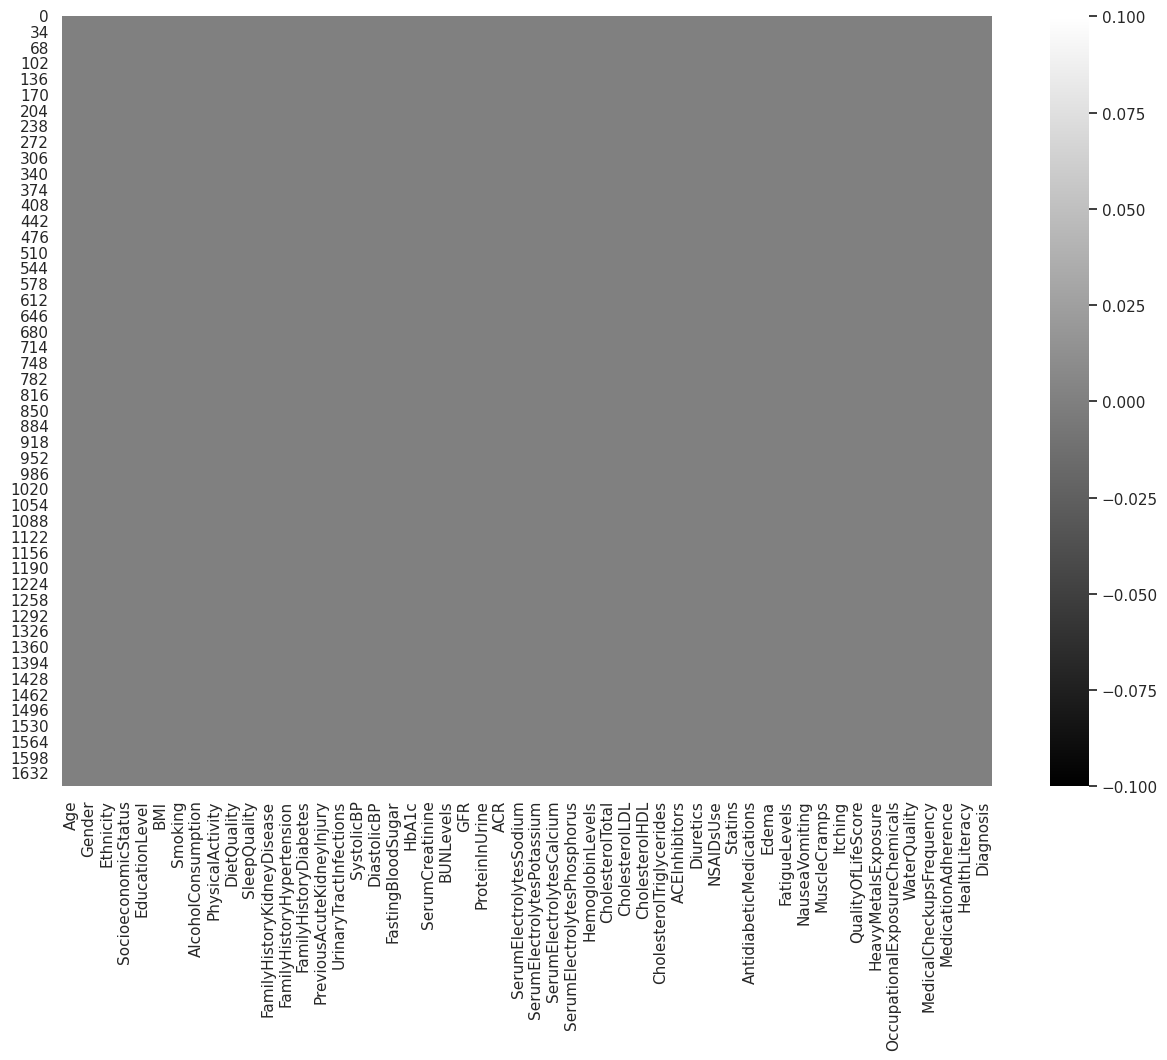

In [6]:
plt.subplots(figsize=(15, 10))
sns.heatmap(kidney_df.isnull(), cmap='gray')

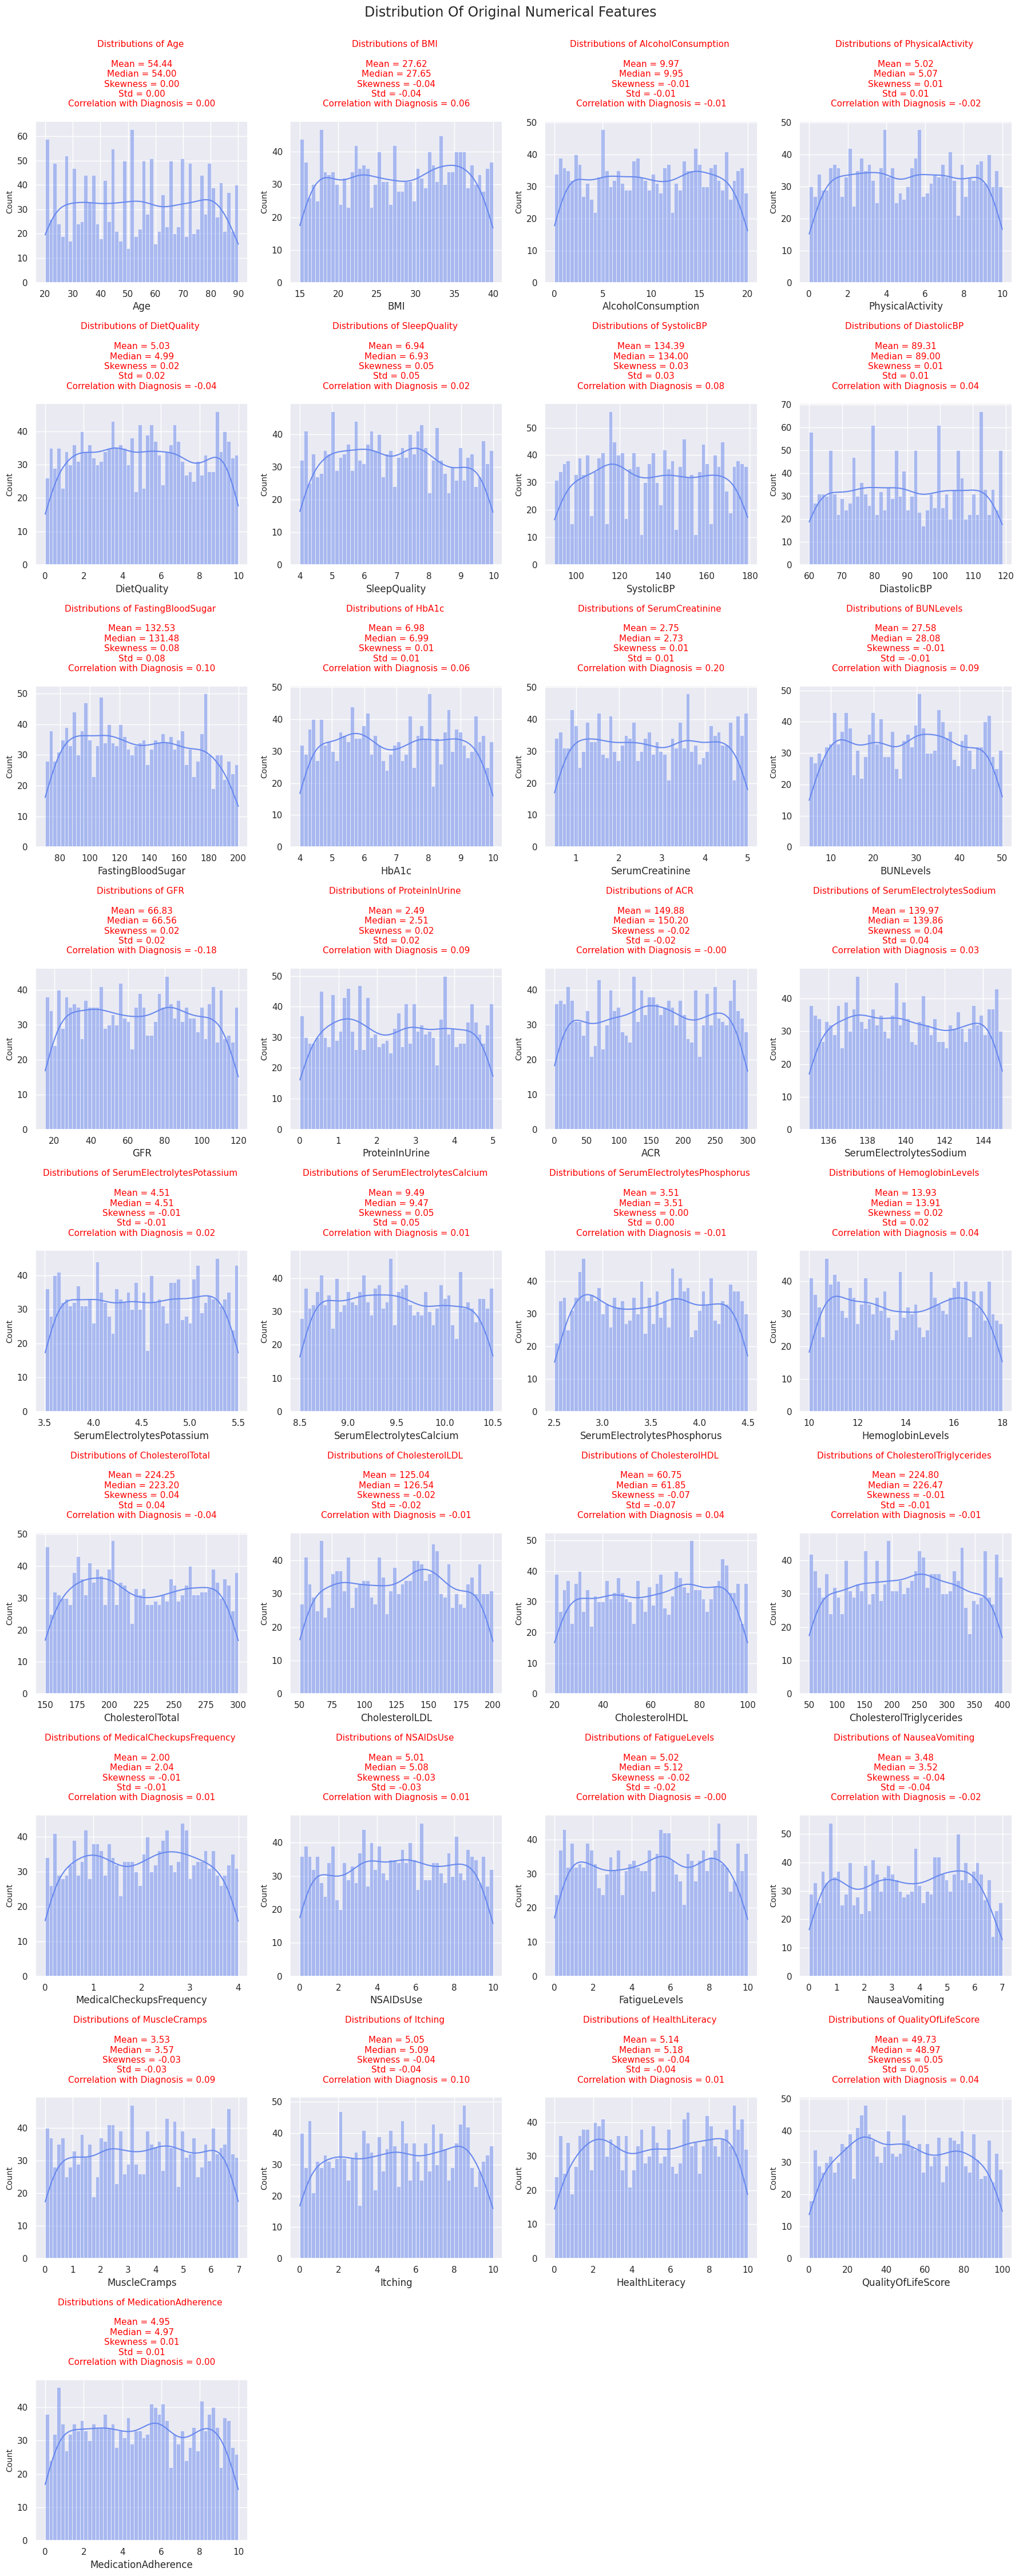

In [20]:

skewness = kidney_df[numerical_features].skew()
mean = kidney_df[numerical_features].mean()
median =kidney_df[numerical_features].median()
std = kidney_df[numerical_features].std()


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    corr_with_diagnosis = kidney_df[["Diagnosis", column]].corr()

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_title(f'Distributions of {column} \n\n'
                 f'Mean = {mean[i]:,.2f}\n'
                 f'Median = {median[i]:,.2f}\n'
                 f'Skewness = {skewness[i]:,.2f}\n'
                 f'Std = {skewness[i]:,.2f}\n'
                 f'Correlation with Diagnosis = {corr_with_diagnosis.values[0][1]:,.2f}\n',
                 fontsize=11, 
                 color='red')
    
    sns.histplot(kidney_df[column], ax=ax, kde=True, bins=50)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

### Correlation with Diagnosis

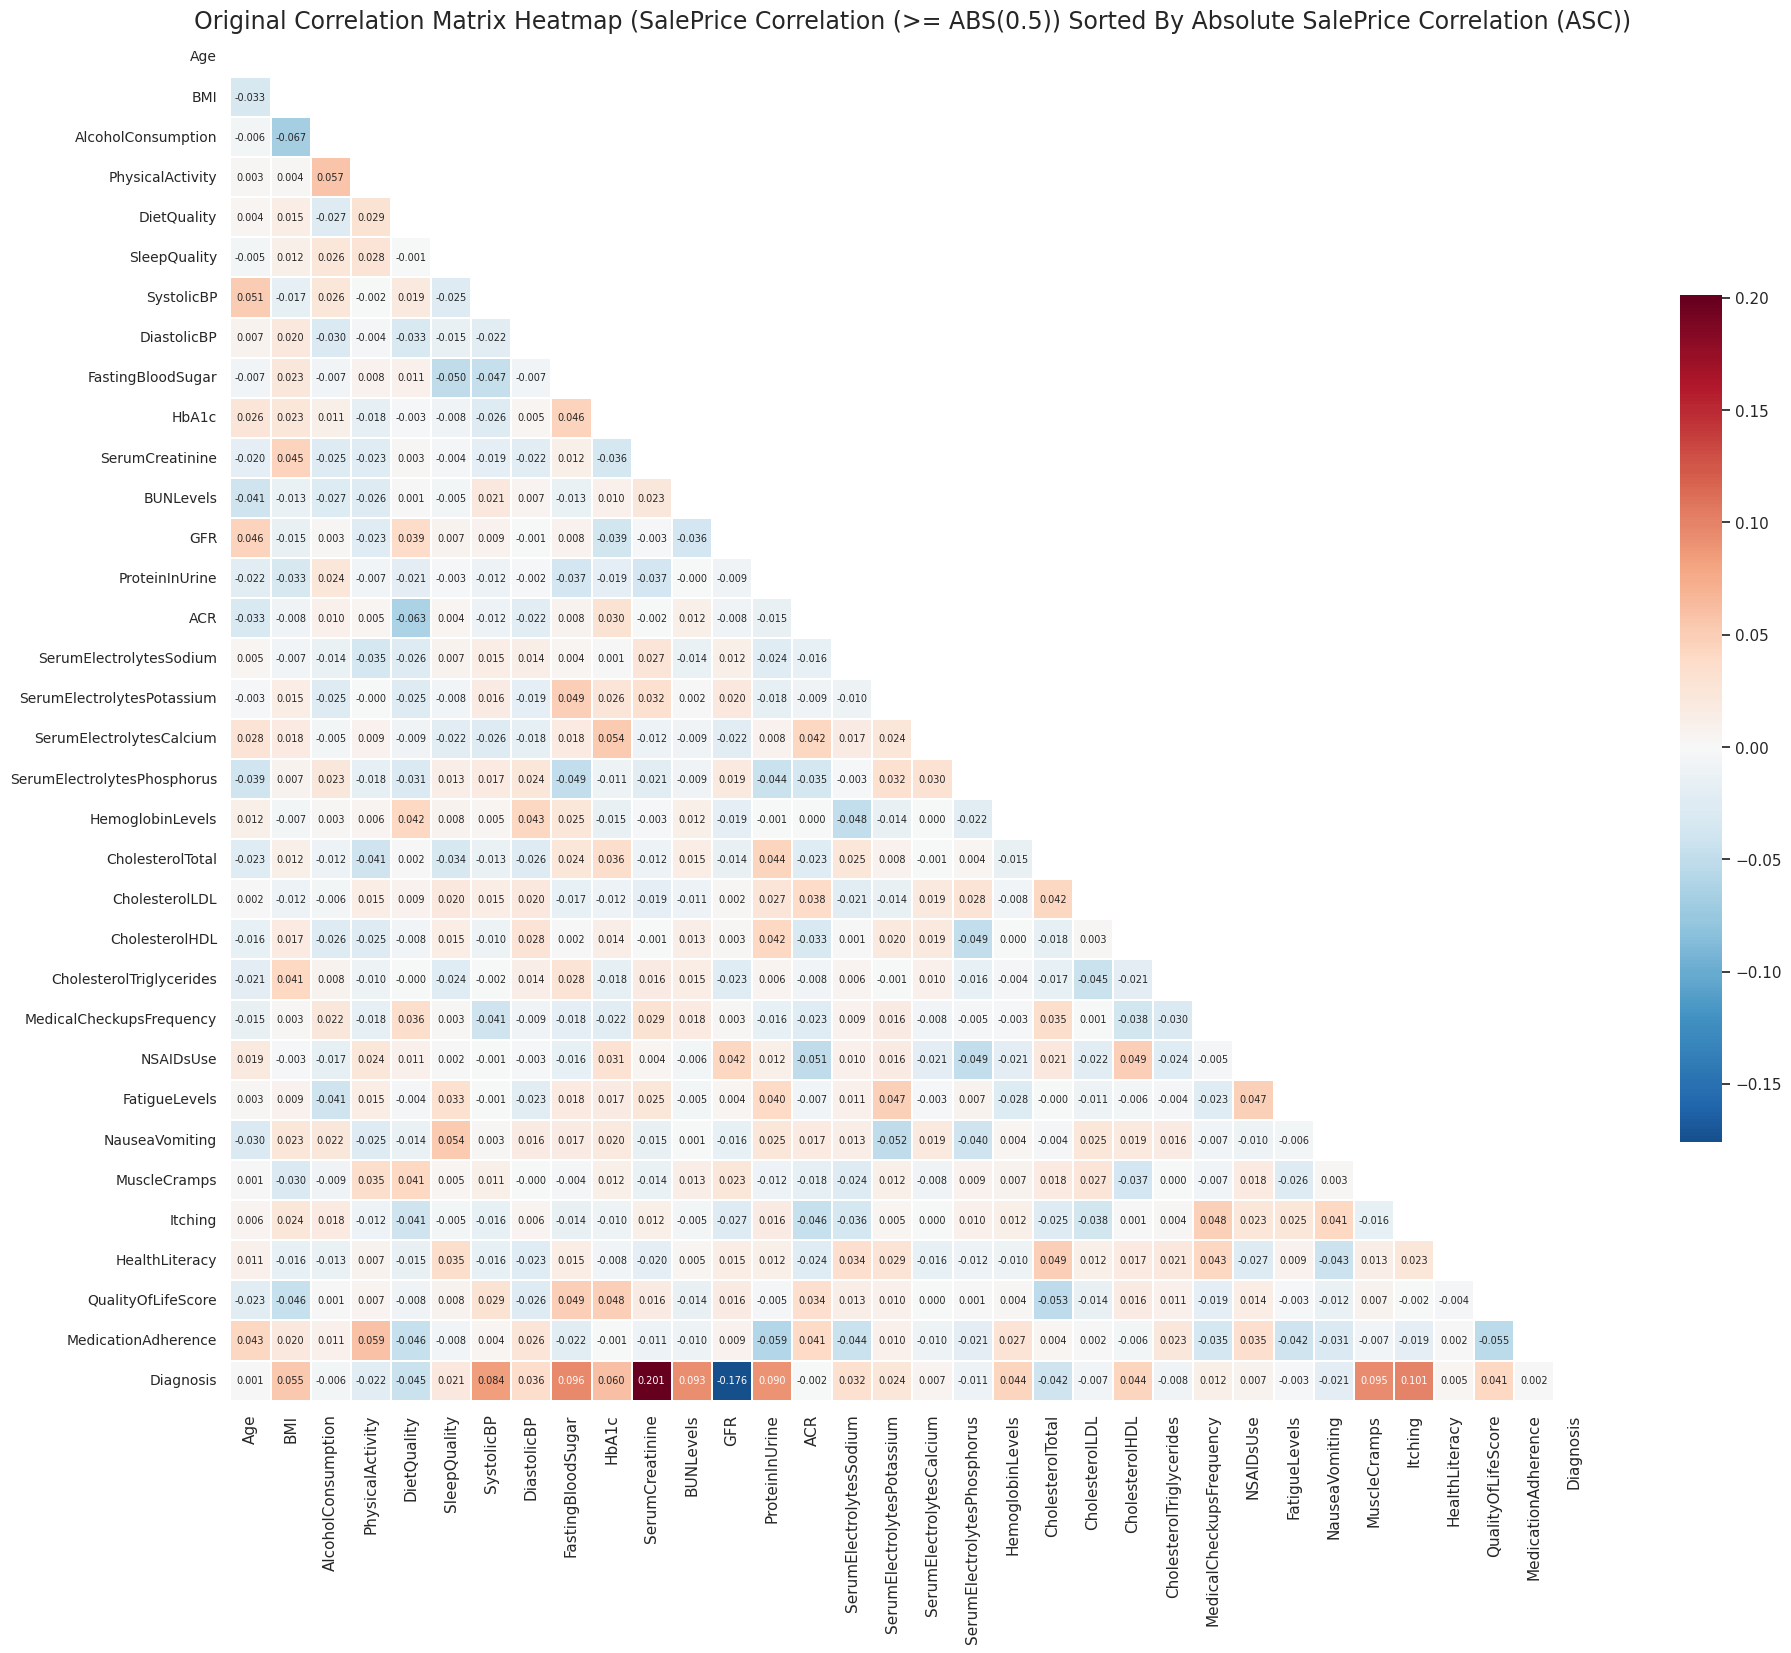

In [25]:
corr = kidney_df[numerical_features + ['Diagnosis']].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(22,22))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 7},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (SalePrice Correlation (>= ABS(0.5)) Sorted By Absolute SalePrice Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

### Categorical Exploration

In [8]:
kidney_df.describe(include='category').transpose()

,count,unique,top,freq
Gender,1659,2,1,855
Ethnicity,1659,4,0,974
SocioeconomicStatus,1659,3,1,658
EducationLevel,1659,4,2,668
Smoking,1659,2,0,1173
FamilyHistoryKidneyDisease,1659,2,0,1425
FamilyHistoryHypertension,1659,2,0,1159
FamilyHistoryDiabetes,1659,2,0,1232
PreviousAcuteKidneyInjury,1659,2,0,1484
UrinaryTractInfections,1659,2,0,1310


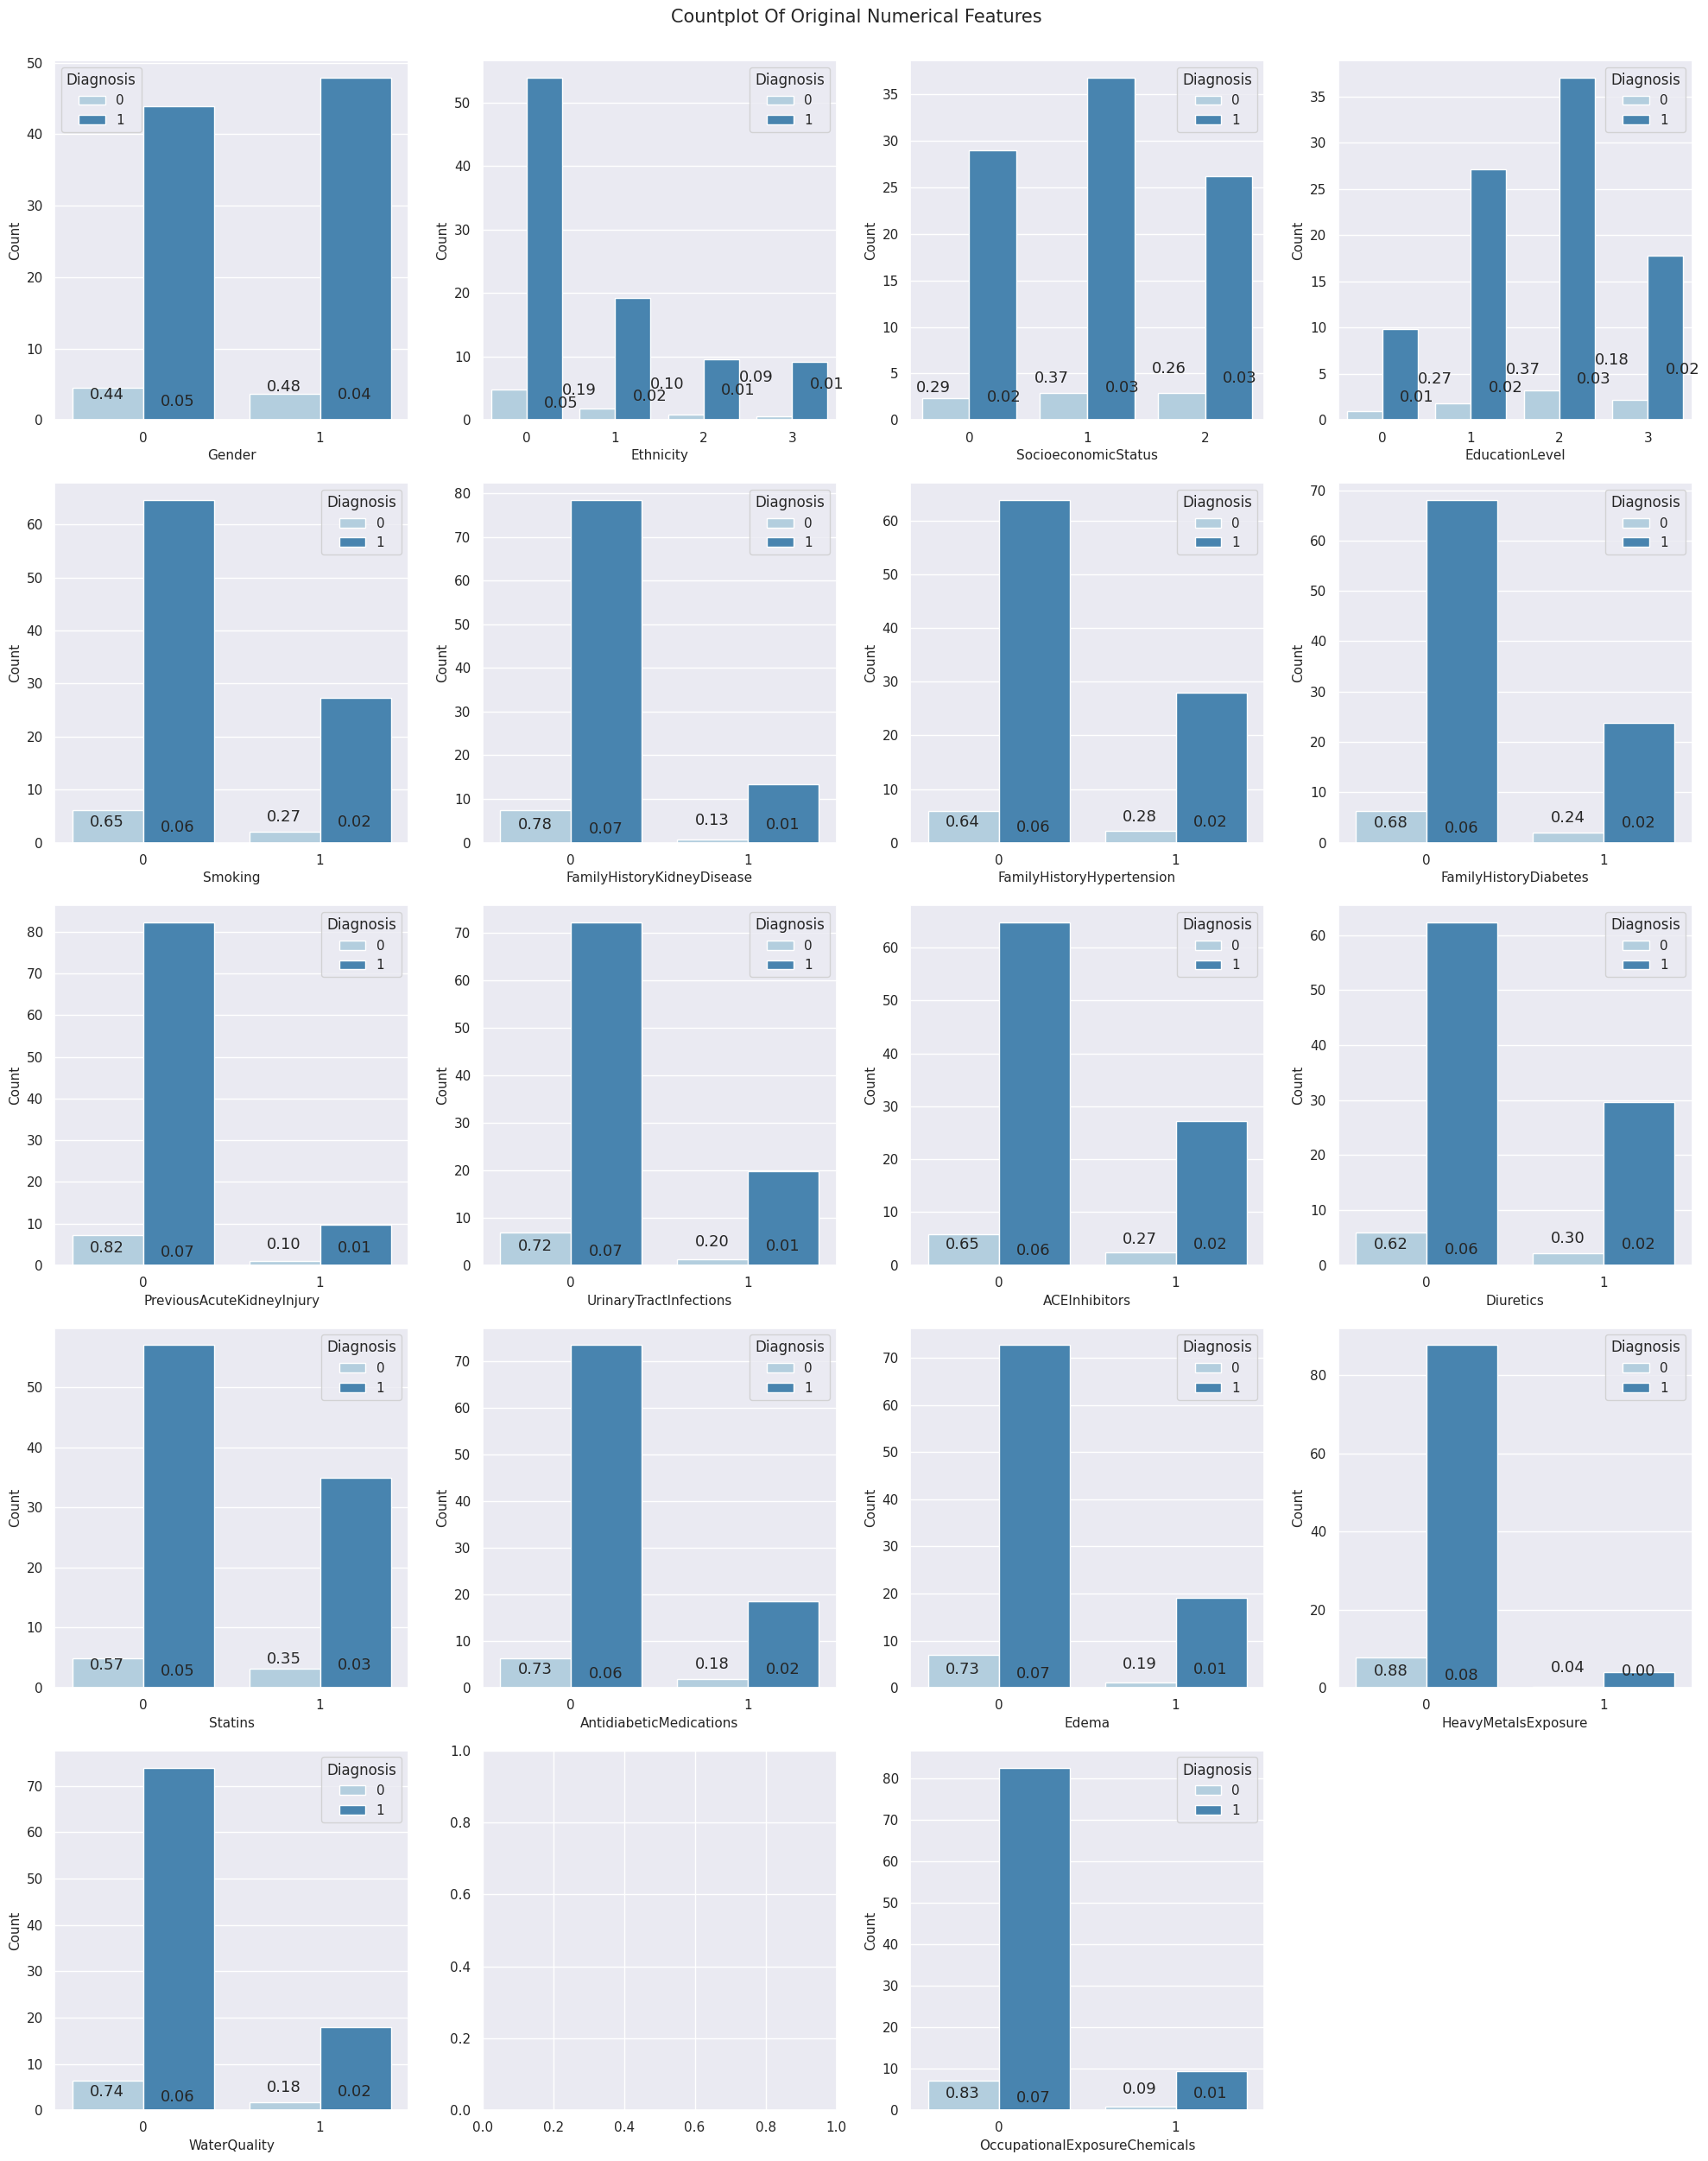

In [26]:

num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Numerical Features", y=1, fontsize=15)


for i, column in enumerate(categorical_features):

    if column == "Diagnosis":
        continue

    ax = axes[i]
    sns.countplot(data=kidney_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  hue=kidney_df['Diagnosis'], 
                  stat='percent')
    
    # Denote proportion of hue
    discrete_values = kidney_df[[column,'Diagnosis']].value_counts(normalize=True)
    discrete_values = discrete_values.reset_index()
    discrete_values = discrete_values.set_index(column)

    range_of = discrete_values.shape[0] // 2
    for i in range(range_of):

        # x_range = ax.get_xlabel
        # Let's find the way or some code that can adjust the text label along with its own scale, trust you too.
        
        ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.15 * range_of ,i + 3), fontsize=13)
        ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.05 * range_of,i  + 2), fontsize=13)
        
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    


# Remove empty subplots if necessary
if len(categorical_features) < num_cols * num_rows:
    for i in range(len(categorical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Target Exploratory

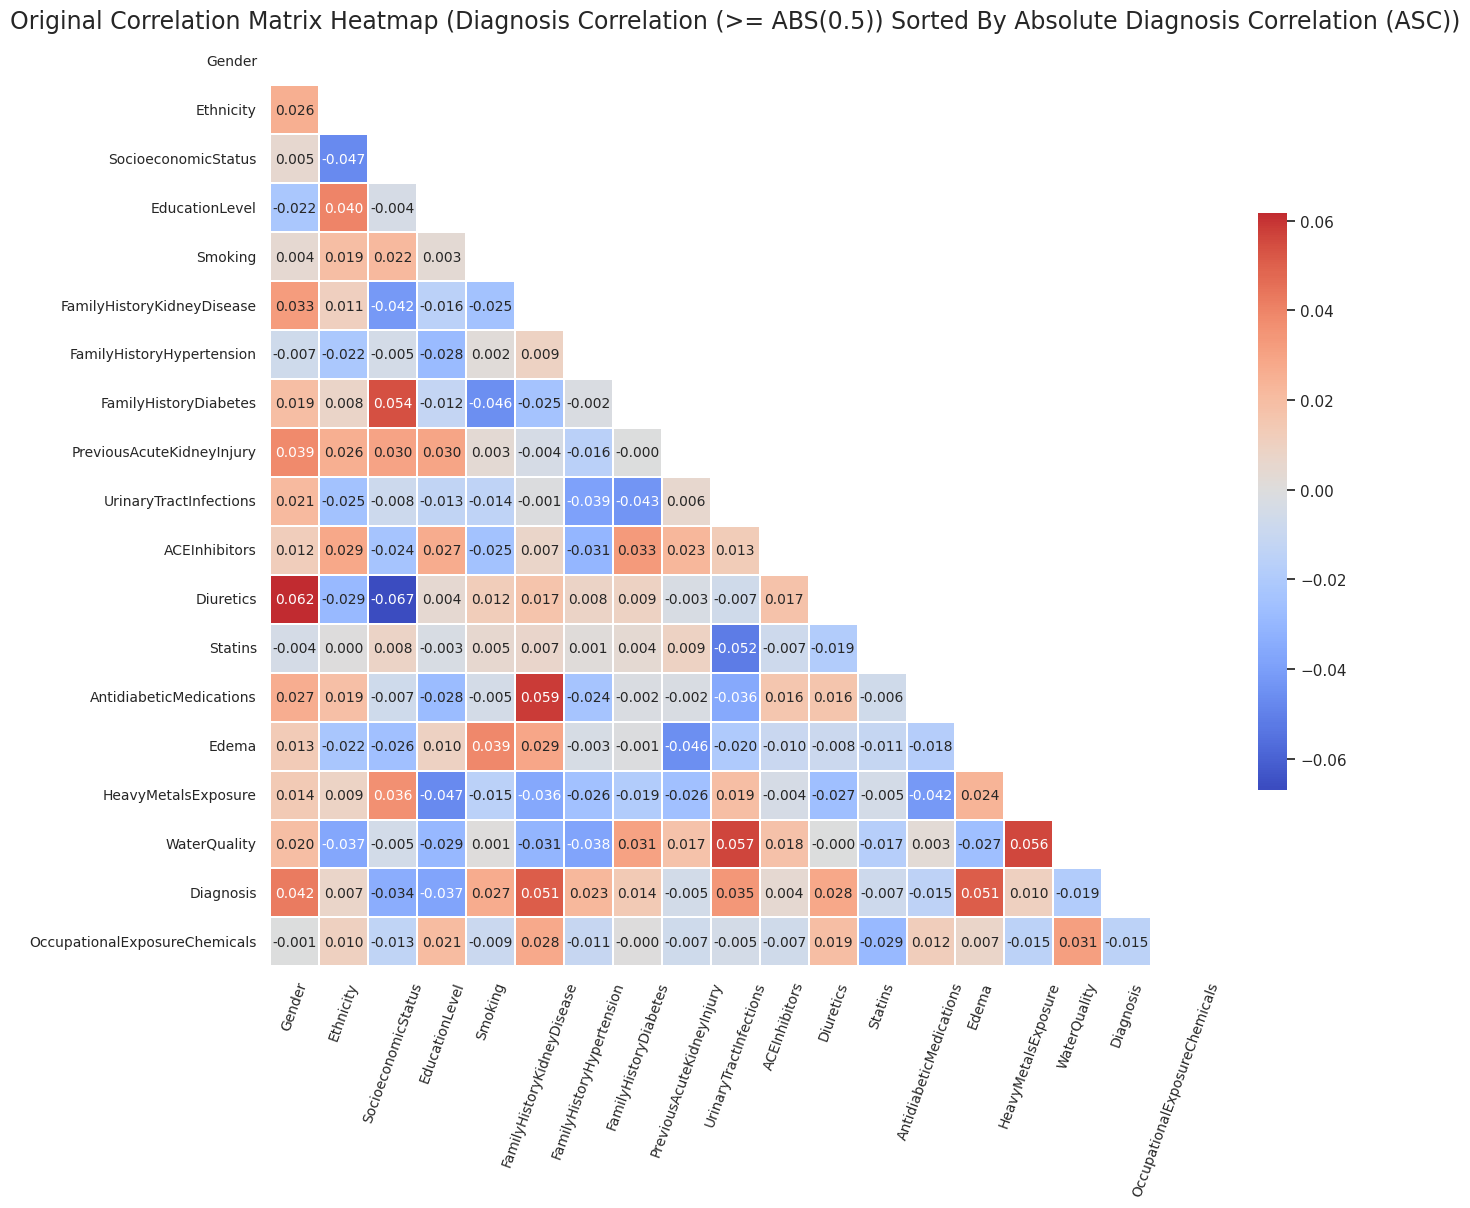

In [28]:
corr = kidney_df[categorical_features].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=70)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (Diagnosis Correlation (>= ABS(0.5)) Sorted By Absolute Diagnosis Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

*Imbalance target class*

## Diagnosis Feature Exploratory

In [29]:
kidney_df['Diagnosis'].value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

## Preprocessing Data

In [11]:
X = kidney_df.drop(columns={'Diagnosis'})
y = kidney_df[['Diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

### Rescaling Numerical features

In [12]:
scalar = MinMaxScaler()

X_train[numerical_features] = scalar.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scalar.transform(X_test[numerical_features])

In [13]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1327.0,0.492486,0.295546,0.0,0.228571,0.485714,0.757143,1.0
BMI,1327.0,0.500680,0.293194,0.0,0.248908,0.503093,0.756742,1.0
AlcoholConsumption,1327.0,0.496174,0.287671,0.0,0.255215,0.489982,0.742851,1.0
PhysicalActivity,1327.0,0.502659,0.287795,0.0,0.253326,0.507307,0.749311,1.0
DietQuality,1327.0,0.509083,0.286319,0.0,0.265757,0.503754,0.755092,1.0
SleepQuality,1327.0,0.491147,0.281712,0.0,0.252408,0.491479,0.717777,1.0
SystolicBP,1327.0,0.500512,0.286659,0.0,0.258427,0.494382,0.752809,1.0
DiastolicBP,1327.0,0.498372,0.297130,0.0,0.254237,0.491525,0.762712,1.0
FastingBloodSugar,1327.0,0.487130,0.281737,0.0,0.247054,0.479219,0.718401,1.0
HbA1c,1327.0,0.495976,0.288705,0.0,0.245578,0.495496,0.754627,1.0


## Modeling

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

svc = SVC()
naive = GaussianNB()
logistic = LogisticRegression()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()

light = LGBMClassifier()
cat = CatBoostClassifier()

base_models = [svc, naive, logistic, forest, tree, knn, ada, light]


In [31]:
classification_reports = {}
confusion_matrixes = {}

for model in base_models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    classification_reports[model.__class__.__name__ ] = classification_report(y_pred, y_test)
    confusion_matrixes[model.__class__.__name__ ] = (confusion_matrix(y_pred, y_test))

[LightGBM] [Info] Number of positive: 1219, number of negative: 108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7930
[LightGBM] [Info] Number of data points in the train set: 1327, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.918613 -> initscore=2.423655
[LightGBM] [Info] Start training from score 2.423655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


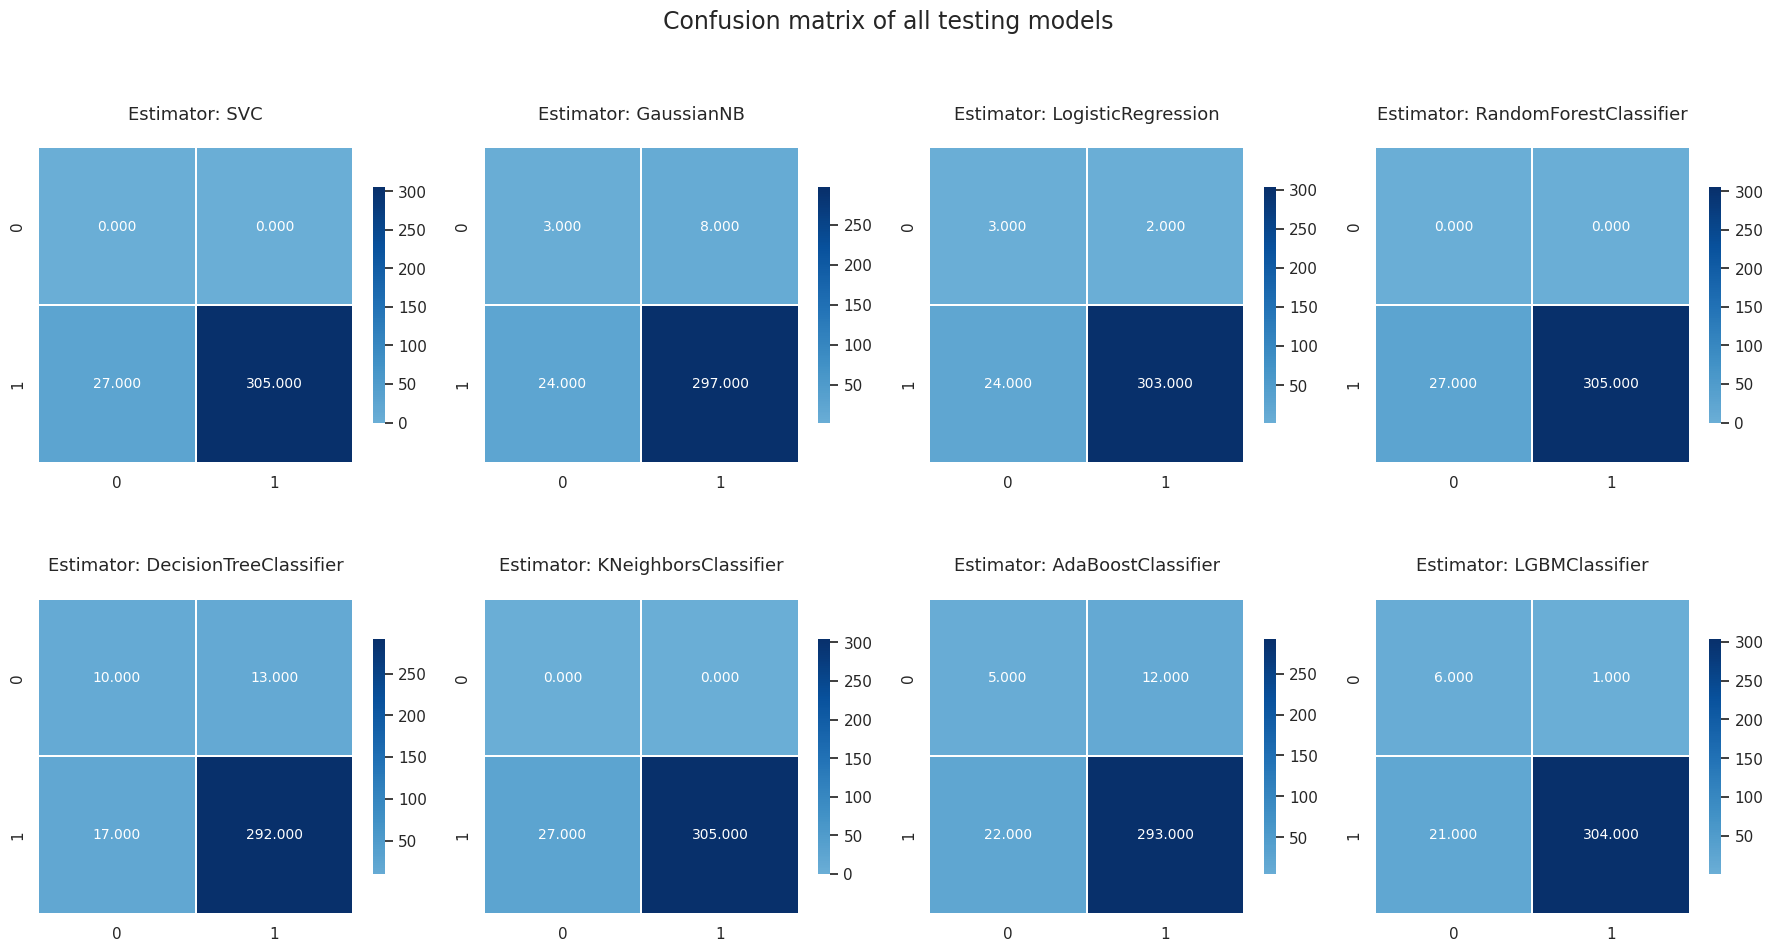

In [32]:
num_cols = 4
num_rows = (len(confusion_matrixes) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all testing models ", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes):

    ax = axes[i]

    sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)


    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes) < num_cols * num_rows:
    for i in range(len(confusion_matrixes), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [33]:
df_reports = pd.DataFrame()
df_break = pd.DataFrame([0]).transpose()

for model_name, report in classification_reports.items():

    df_report = pd.DataFrame([line.split(' '*6) for line in report.split('\n')], 
                columns=['Metric','Class', 'Precision', 'Recall', 'F1score', 'support']).dropna()
    df_report = pd.concat([df_report,df_break])
    df_report['Model_name'] = pd.Series([model_name]*6)
    df_report.set_index(['Model_name', 'Metric'],inplace=True,)
    df_report.fillna(' ', inplace=True)
    df_report.reset_index()

    df_reports = pd.concat([df_reports,df_report])


df_reports.drop(columns={0}, inplace=True)
df_reports


Class Precision Recall  F1score support
Model_name             Metric                                                
SVC                                       0      0.00   0.00     0.00       0
                                          1      1.00   0.92     0.96     332
                           accuracy                              0.92     332
                       NaN                                                   
GaussianNB                                0      0.11   0.27     0.16      11
                                          1      0.97   0.93     0.95     321
                           accuracy                              0.90     332
                       NaN                                                   
LogisticRegression                        0      0.11   0.60     0.19       5
                                          1      0.99   0.93     0.96     327
                           accuracy                              0.92     332
                       NaN                                                   
RandomForestClassifier                    0      0.00   0.00     0.00       0
                                          1      1.00   0.92     0.96     332
                           accuracy                              0.92     332
                       NaN                                                   
DecisionTreeClassifier                    0      0.37   0.43     0.40      23
                                          1      0.96   0.94     0.95     309
                           accuracy                              0.91     332
                       NaN                                                   
KNeighborsClassifier                      0      0.00   0.00     0.00       0
                                          1      1.00   0.92     0.96     332
                           accuracy                              0.92     332
                       NaN                                                   
AdaBoostClassifier                        0      0.19   0.29     0.23      17
                                          1      0.96   0.93     0.95     315
                           accuracy                              0.90     332
                       NaN                                                   
LGBMClassifier                            0      0.22   0.86     0.35       7
                                          1      1.00   0.94     0.97     325
                           accuracy                              0.93     332
                       NaN